In [23]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt


## importer les données


In [24]:
#importer mes donnees 
data = pd.read_csv("SuperMarket Analysis.csv")

#afficher les 5 premieres lignes 
data.head()


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Sales,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,Alex,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,1:08:00 PM,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,Giza,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29:00 AM,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,Alex,Yangon,Normal,Female,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,1:23:00 PM,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,Alex,Yangon,Member,Female,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,8:33:00 PM,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,Alex,Yangon,Member,Female,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37:00 AM,Ewallet,604.17,4.761905,30.2085,5.3


In [25]:
#lignes et colonnes manquantes 
lignes_manquantes = data.isnull().sum(axis=1)
colonnes_manquantes = data.isnull().sum()
print(f"les lignes manquantes sont : {lignes_manquantes}")
print(f"les colonnes manquantes sont : {colonnes_manquantes}")

#voir les doublons
doublons = data.duplicated().sum() 
print(f"les doublons sont : {doublons}") 

#supprimer les doublons
data = data.drop_duplicates() 



#verifier que les colonnes int contiennent des valeurs numeriques 
data["Unit price"] = pd.to_numeric(data["Unit price"], errors='coerce') 
data["Quantity"] = pd.to_numeric(data["Quantity"], errors='coerce') 
data["Sales"] = pd.to_numeric(data["Sales"], errors='coerce')
data["Rating"] = pd.to_numeric(data["Rating"], errors='coerce')



les lignes manquantes sont : 0      0
1      0
2      0
3      0
4      0
      ..
995    0
996    0
997    0
998    0
999    0
Length: 1000, dtype: int64
les colonnes manquantes sont : Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Sales                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64
les doublons sont : 0


In [26]:
#avoir les donnes aberantes avec la methode interquantile 
#fonction detecter les valeurs aberantes 
def valeur_manquante(df , colonne) :
    q1 = df[colonne].quantile(0.25)
    q3 = df[colonne].quantile(0.75)
    iqr = q3 - q1
    born_sup = q3 + 1.5 * iqr
    born_inf = q1 - 1.5 * iqr
    return df[(df[colonne] < born_inf) | (df[colonne] > born_sup)][colonne] 

#suuprimer les valeurs aberantes pour les colonnes numeriques
for col in data.select_dtypes(include=['int64', 'float64']).columns:
    data = data[~((data[col] < data[col].quantile(0.25)) | (data[col] > data[col].quantile(0.75)))] #supprimer les valeurs aberantes
    
 
#changer la colonne en Date 
data["Date"] = pd.to_datetime(data["Date"] , errors='coerce')
print(data["Date"].dtypes)


#verifier que sales est egal a la multiplication de unit price et quantity + tax 5% pour toute les lignes
if data['Sales'].equals((data['Unit price'] * data['Quantity']) + (data['Tax 5%'])):
    print("Sales est egal a la multiplication de unit price et quantity + tax 5% pour toute les lignes")
    
    



    

datetime64[ns]


## Analyse Exploratoire des Données

le nombre de lignes est : 1000
le nombre de colonnes est : 17
la moyenne des ventes est : 322.966749
le maximum des ventes est : 1042.65
le minimum des ventes est : 10.6785
l'ecart type des ventes est : 245.88533510097207


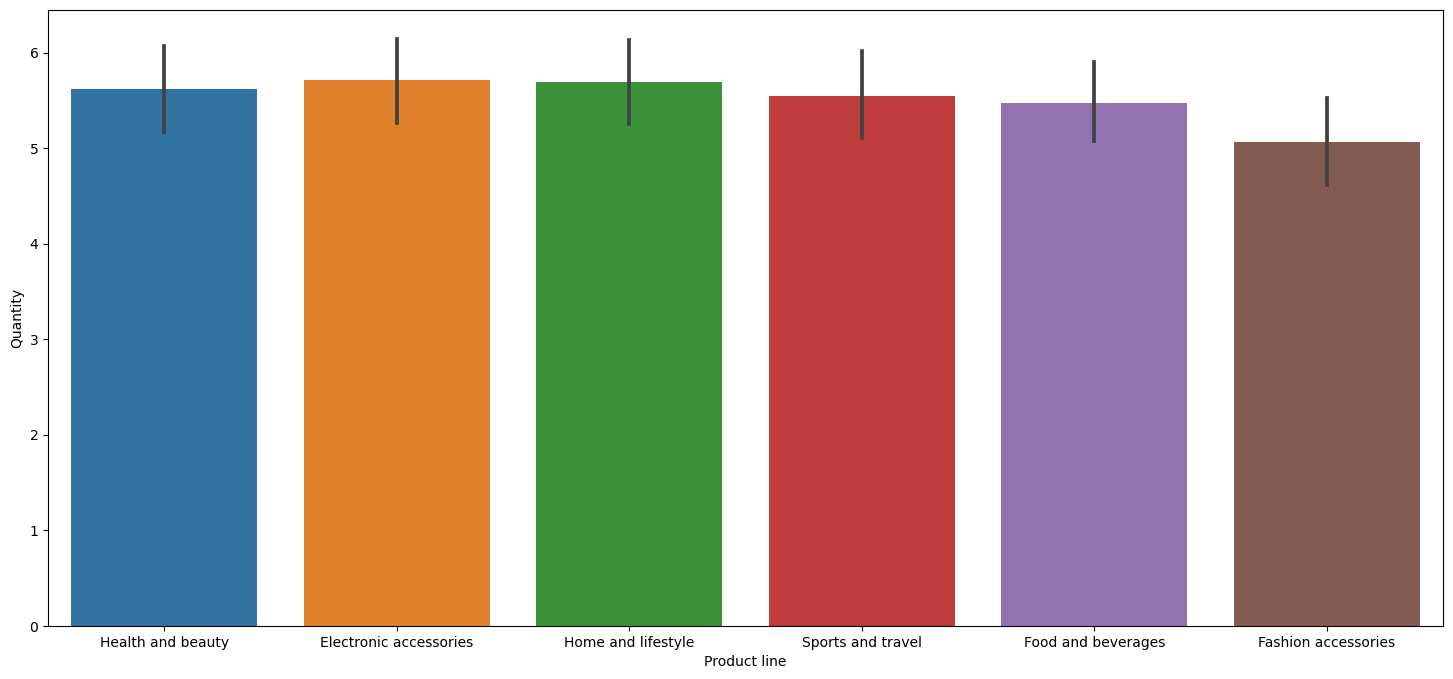

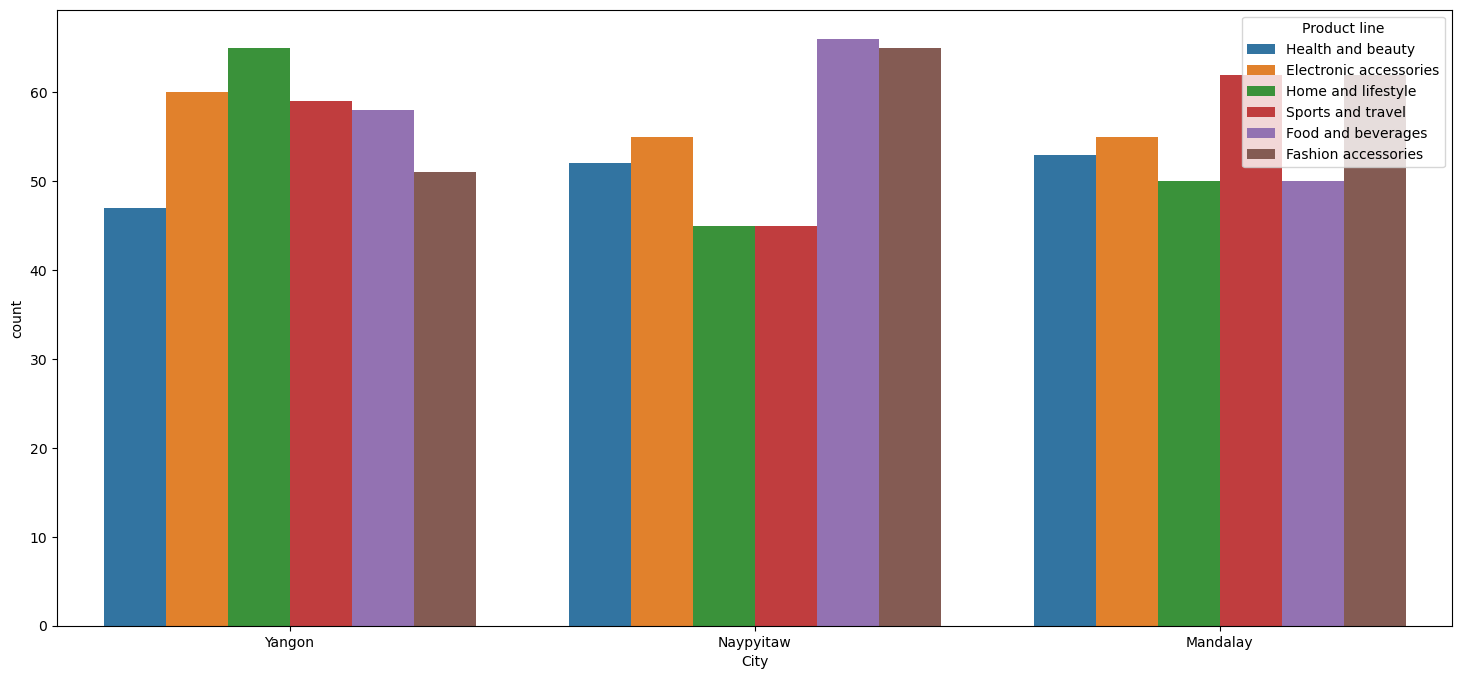

In [27]:
data = pd.read_csv("SuperMarket Analysis.csv")

#nombre de lig,nes et colonnes
print(f"le nombre de lignes est : {data.shape[0]}")
print(f"le nombre de colonnes est : {data.shape[1]}")

#moyenne des ventes maximum et minimum ecart type
moyenne = data["Sales"].mean()
maximum = data["Sales"].max()
minimum = data["Sales"].min()
ecart_type = data["Sales"].std()
print(f"la moyenne des ventes est : {moyenne}")
print(f"le maximum des ventes est : {maximum}")
print(f"le minimum des ventes est : {minimum}")
print(f"l'ecart type des ventes est : {ecart_type}")

 #histogramme de la quantite par ligne de produit
plt.figure(figsize=(18, 8))
sns.barplot(x = "Product line" , y = "Quantity" , data = data )
plt.show()

#histpogramme des categories de produits en fonction des villes
plt.figure(figsize=(18, 8))
sns.countplot(x = "City" , hue = "Product line" , data = data )
plt.show()



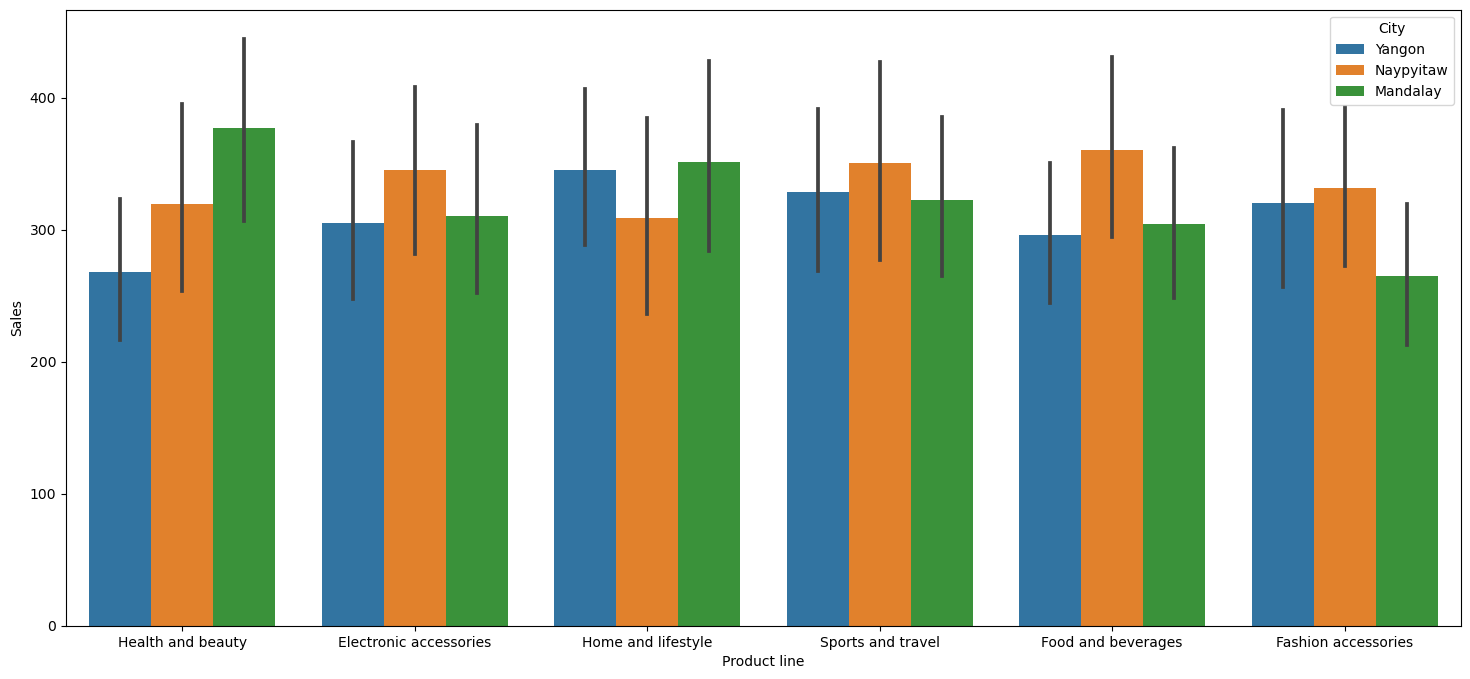

In [28]:
#histogramme des vezntes par categories en fonction des villes 
plt.figure(figsize=(18, 8))
sns.barplot(x = "Product line" , y = "Sales" , data = data , hue = "City")
plt.show()

City
Mandalay     32.881921
Naypyitaw    34.235322
Yangon       32.882757
Name: gross income, dtype: float64
Branch
Alex     32.882757
Cairo    32.881921
Giza     34.235322
Name: gross income, dtype: float64
Product line
Electronic accessories    17.622505
Fashion accessories       16.370236
Food and beverages        17.277677
Health and beauty         15.499093
Home and lifestyle        16.533575
Sports and travel         16.696915
Name: Quantity, dtype: float64


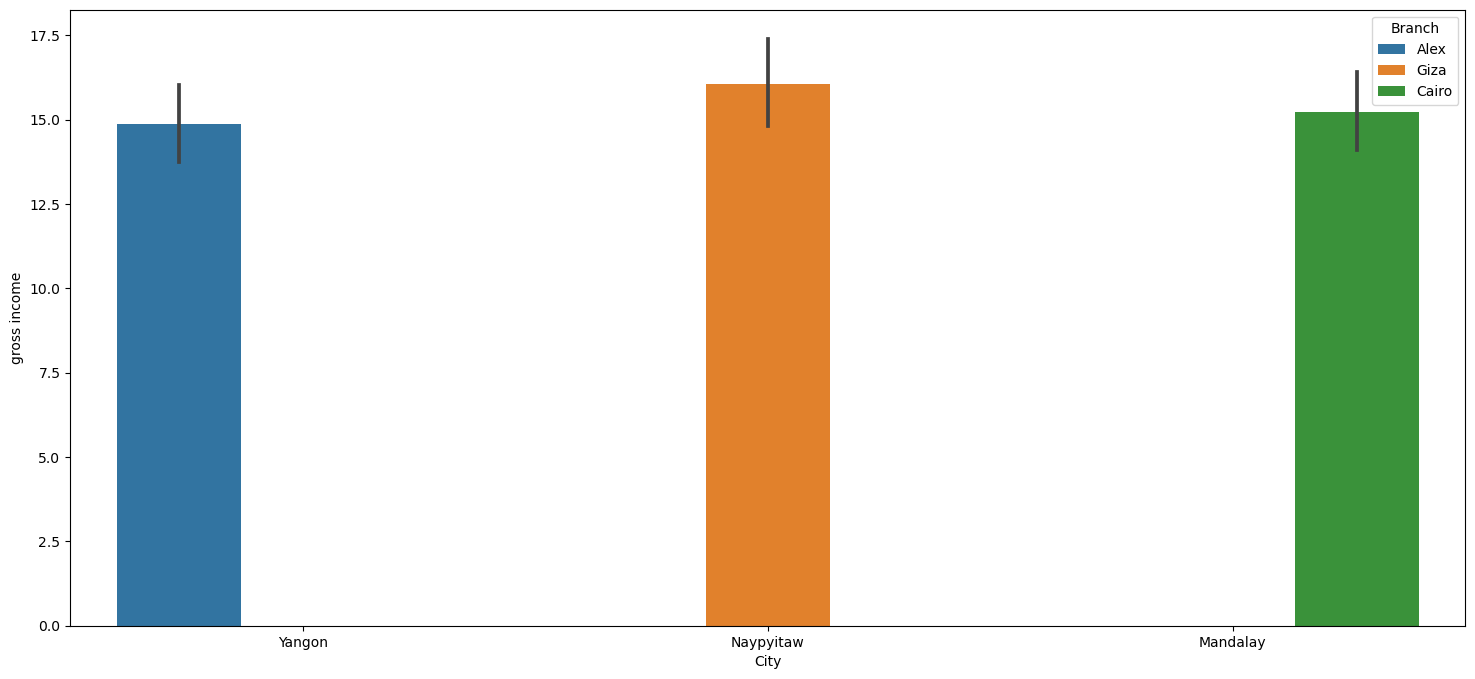

In [29]:
#graphe pour voir les chiffres des supermarches en fonction des villes
plt.figure(figsize=(18, 8))
#lle chiffre d'affaire pour chaque supermarche en %
sns.barplot(x = "City" , y = "gross income" , data = data , hue = "Branch") 
#calcul pourecntage de chiffre d'affaire pour chaque supermarche
pourcentage_ville = data.groupby("City")["gross income"].sum() / data["gross income"].sum() * 100
print(pourcentage_ville) 
pourcentage_branch = data.groupby("Branch")["gross income"].sum() / data["gross income"].sum() * 100
print(pourcentage_branch)

#le produit le plus vendu  en pourcentage
produit_vendu = data.groupby("Product line")["Quantity"].sum() / data["Quantity"].sum() * 100
print(produit_vendu)
plt.show()

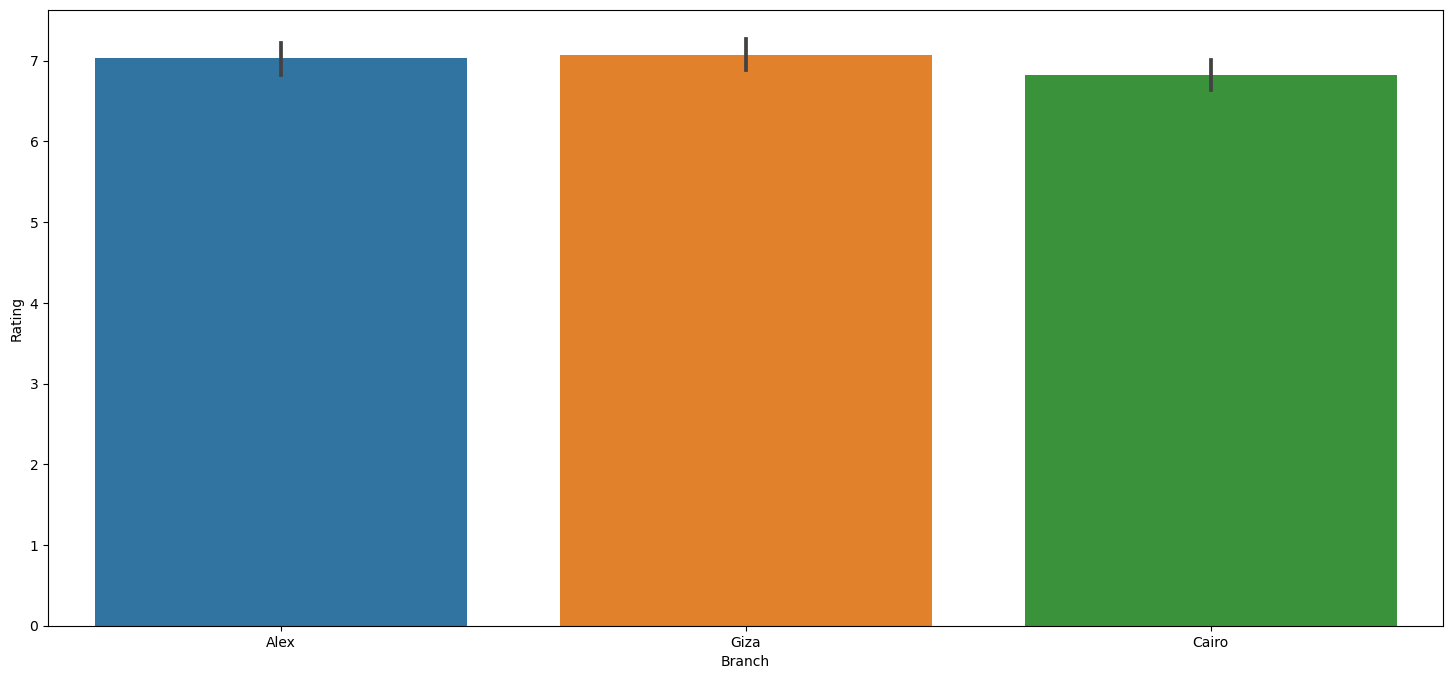

In [30]:
#satisfaction des clients en fonction des villes
plt.figure(figsize=(18, 8))
sns.barplot(x = "Branch" , y = "Rating" , data = data  )  #la satisfaction des clients pour chaque supermarche
plt.show() 

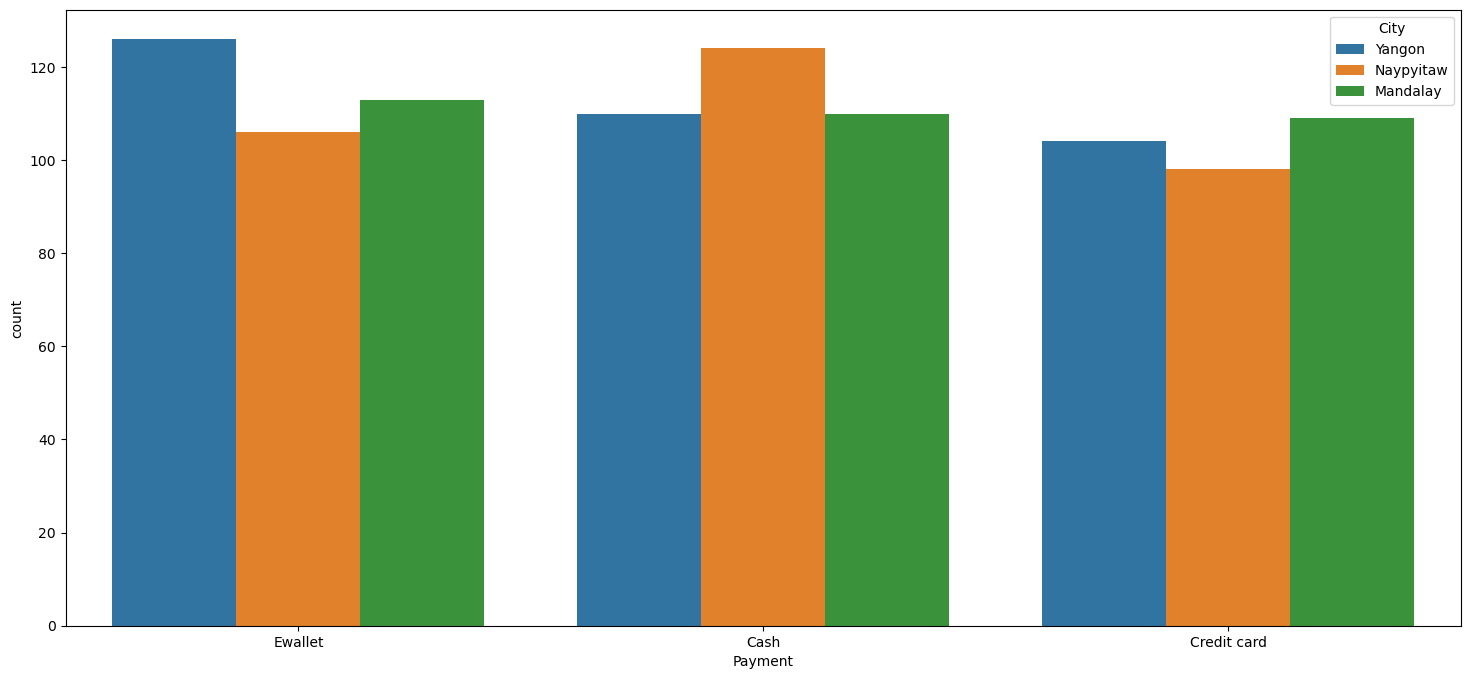

Payment
Ewallet        34.5
Cash           34.4
Credit card    31.1
Name: count, dtype: float64
Customer type
Member    15.987759
Normal    14.589161
Name: gross income, dtype: float64


In [31]:
#mode de paiement  preferes en fonction des villes 
plt.figure(figsize=(18, 8))
sns.countplot(x = "Payment" , data = data  , hue="City")  #le mode de paiement preferes pour chaque supermarche 
plt.show()

#nombre de clients par differentes modes de paiement
nombre_clients = data["Payment"].value_counts() / data["Payment"].count() * 100
print(nombre_clients)

#depenses moyennes par clients
depenses = data.groupby("Customer type")["gross income"].mean()
print(depenses) #interpretation : les clients de type member depensent plus que les clients de type normal


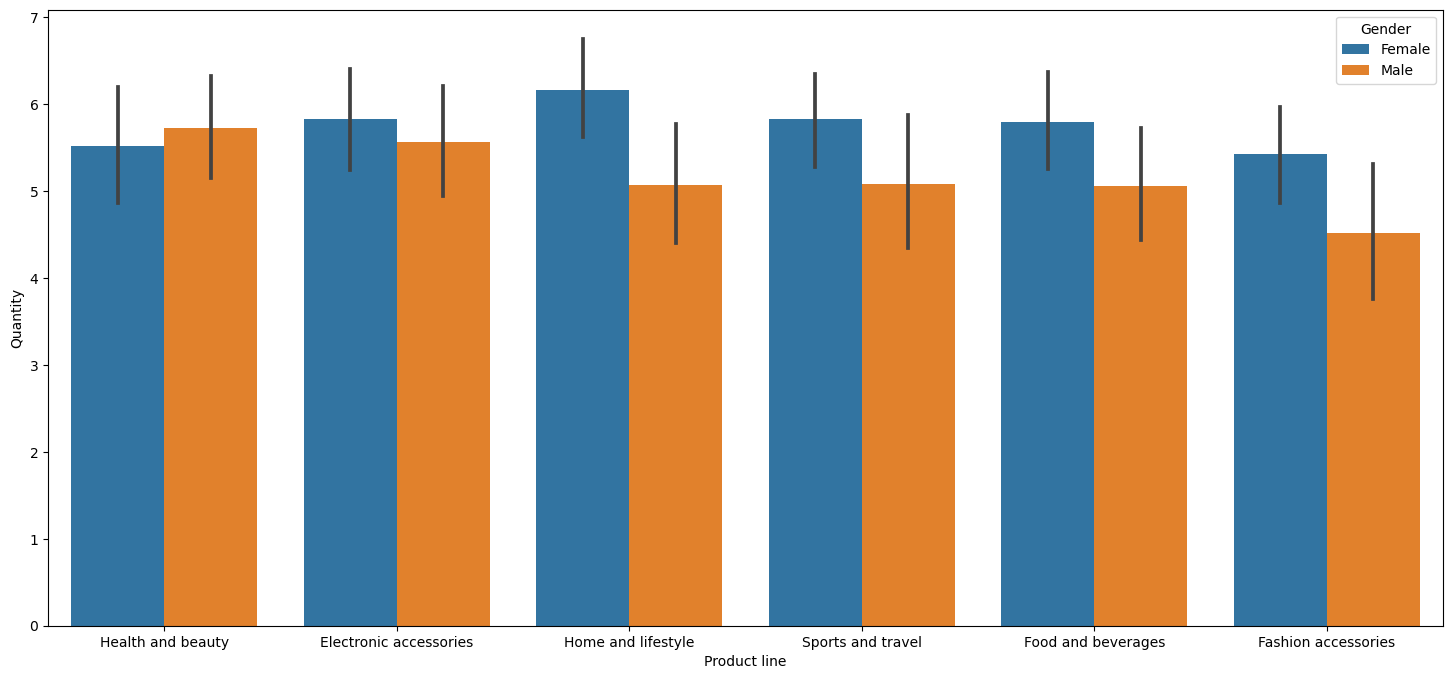

Gender
Female    57.1
Male      42.9
Name: count, dtype: float64


In [32]:
#homme et femme qui achetent le plus dans chaque produit
plt.figure(figsize=(18, 8))
sns.barplot(x = "Product line" , y = "Quantity" , data =data  , hue="Gender")
plt.show()

#plus de clients d'hommme ou de femme
nombre_clients = data['Gender'].value_counts() / data['Invoice ID'].count() * 100
print(nombre_clients) #interpretation : il y a plus de femmes que d'hommes


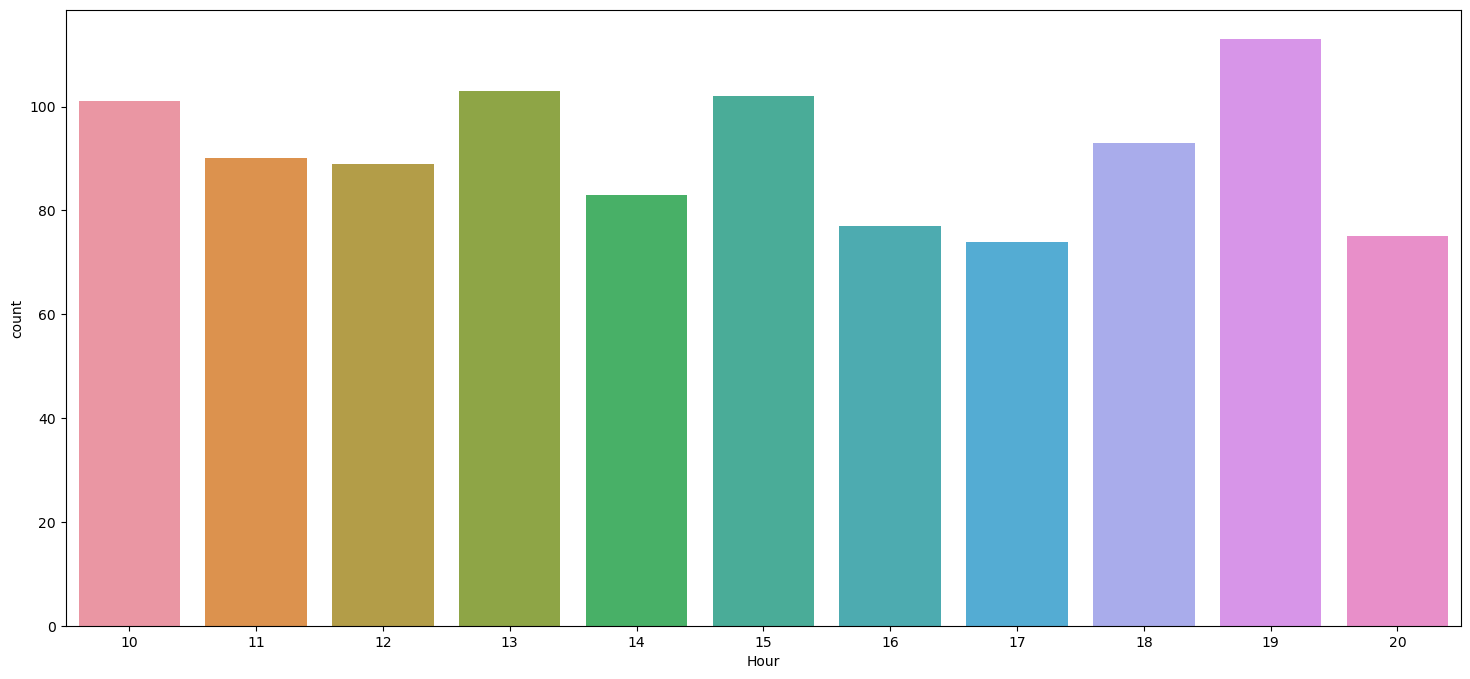

Hour
10    10.1
11     9.0
12     8.9
13    10.3
14     8.3
15    10.2
16     7.7
17     7.4
18     9.3
19    11.3
20     7.5
Name: Invoice ID, dtype: float64


In [33]:
#extraire lheure avec time et pm ou amm 
data['Time'] = pd.to_datetime(data['Time'], format='%I:%M:%S %p')
data["Hour"] = data["Time"].dt.hour #extraire l'heure
data["minute"] = data["Time"].dt.minute #extraire les minutes
data["second"] = data["Time"].dt.second #extraire les second

plt.figure(figsize=(18, 8))
sns.countplot(x="Hour", data=data) #l'heure du rush est a 19heure
plt.show()

#nombre de transactions par heure
nombre = data.groupby("Hour")["Invoice ID"].count() / data["Invoice ID"].count() * 100
print(nombre)

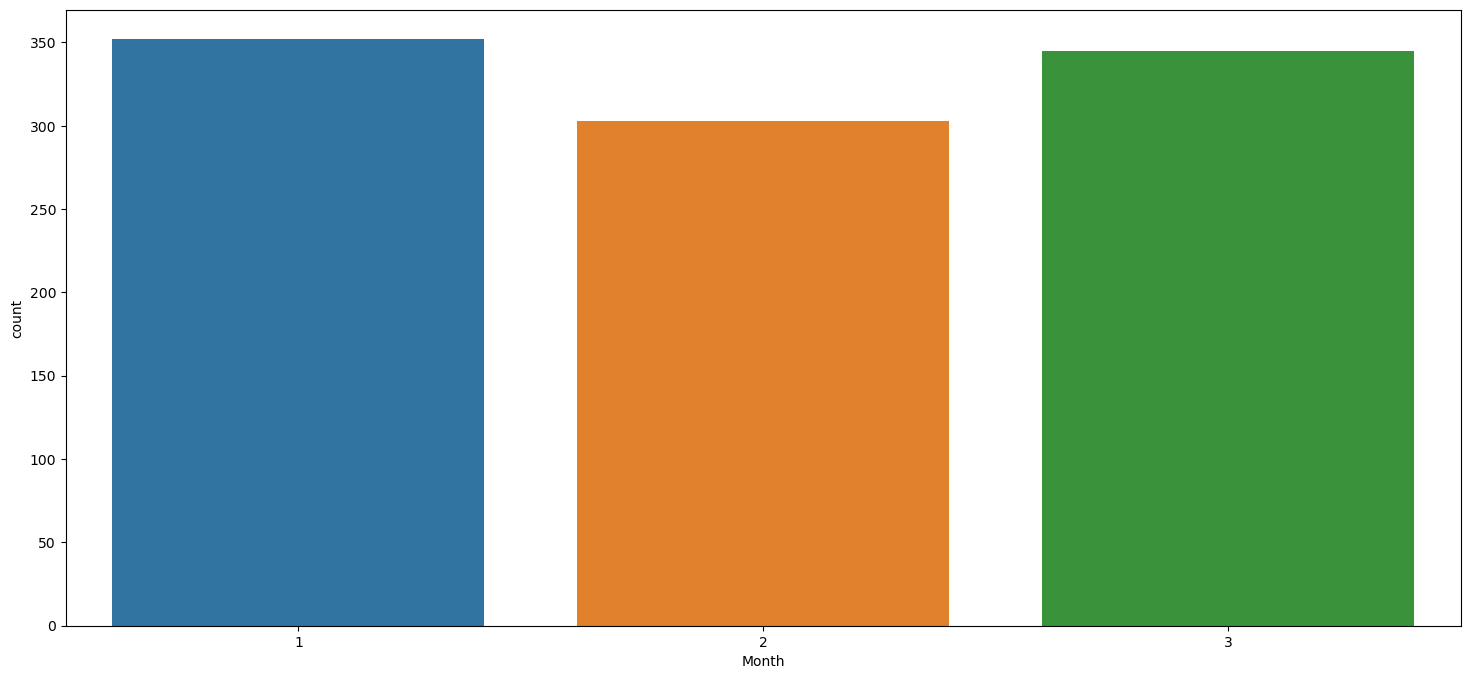

Month
1    35.2
2    30.3
3    34.5
Name: Invoice ID, dtype: float64


In [34]:
#mois de l'annee ou il y a le plus de vente
data['Date'] = pd.to_datetime(data['Date'])
data["Month"] = data["Date"].dt.month
data["Day"] = data["Date"].dt.day
data["Year"] = data["Date"].dt.year  



plt.figure(figsize=(18, 8))
sns.countplot(x="Month", data=data) #le mois de l'annee ou il y a le plus de vente est en janvier
plt.show()

nombre = data.groupby("Month")["Invoice ID"].count() / data["Invoice ID"].count() * 100
print(nombre)

Prediction des ventes


In [35]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.preprocessing import LabelEncoder


In [36]:
#encoder les variables categoriques

encoder = LabelEncoder()
data["Product line"] = encoder.fit_transform(data["Product line"])
data["Branch"] = encoder.fit_transform(data["Branch"])
data["City"] = encoder.fit_transform(data["City"])
data["Customer type"] = encoder.fit_transform(data["Customer type"])
data["Payment"] = encoder.fit_transform(data["Payment"]) 
data["Gender"] = encoder.fit_transform(data["Gender"])



In [40]:
#normaliser les donnees numeriques
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data[["Unit price" , "Quantity" , "Tax 5%" , "Rating" , "gross income"]] = scaler.fit_transform(data[["Unit price" , "Quantity" , "Tax 5%" , "Rating" , "gross income"]])

x = data[["Product line", "Branch", "City", "Customer type", "Payment", "Gender", "Unit price", "Quantity", "Hour", "Rating"]]
y = data["Sales"]

x_train , x_test , y_train , y_test = train_test_split(x , y , test_size = 0.2 , random_state = 42) #split les donnees en train et test , 80% pour le train et 20% 

#model de regression lineaire
model = linear_model.LinearRegression()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print(f"le score du model est : {model.score(x_test , y_test)}")


le score du model est : 0.9027055563923324


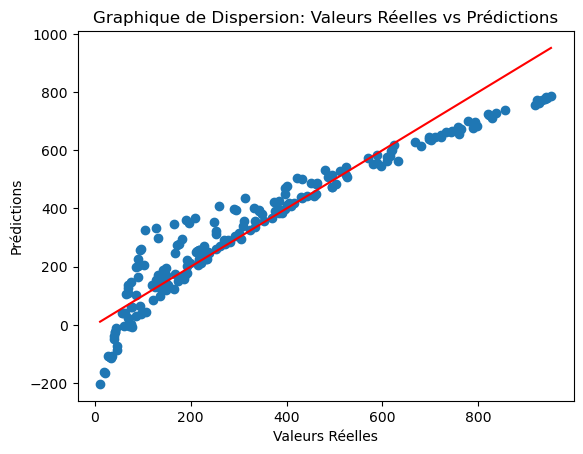

In [52]:
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ligne de référence
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Graphique de Dispersion: Valeurs Réelles vs Prédictions')
plt.show()



modele XGBoost 

In [56]:
#model xgboost
import xgboost as xgb # type: ignore
model = xgb.XGBRegressor()
model.fit(x_train , y_train)
y_pred = model.predict(x_test)
print(f"le score du model est : {model.score(x_test , y_test)}")




le score du model est : 0.9987517223345986


Text(0.5, 1.0, 'Graphique de Dispersion: Valeurs Réelles vs Prédictions')

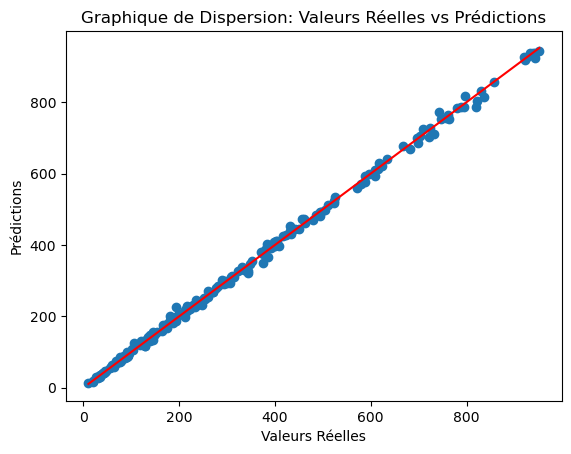

In [57]:
#graphique de dispersion
import matplotlib.pyplot as plt
plt.scatter(y_test, y_pred)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red')  # Ligne de référence
plt.xlabel('Valeurs Réelles')
plt.ylabel('Prédictions')
plt.title('Graphique de Dispersion: Valeurs Réelles vs Prédictions')